In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('monthly.csv')

In [78]:
df.head()

,month,sales,onpromotion,is_holiday,month_num,year,lag_1,lag_12,rolling_3,rolling_6
0,2014-01-01,291664.751474,0,33.0,1,2014,202431.688007,156864.199004,222062.017166,188643.427590
1,2014-02-01,159458.498923,0,0.0,2,2014,291664.751474,129814.332014,217851.646135,190355.958585
2,2014-03-01,273914.544883,0,99.0,3,2014,159458.498923,151666.227994,241679.265093,210662.469395
3,2014-04-01,173138.393132,0,165.0,4,2014,273914.544883,155848.493959,202170.478979,212116.248073
4,2014-05-01,181408.251539,0,165.0,5,2014,173138.393132,156870.205004,209487.063185,213669.354660


In [79]:
df['month'] = pd.to_datetime(df['month'])
df = df.rename(columns={'month': 'ds', 'sales': 'y'})


In [80]:
holidays = df[['ds', 'is_holiday']].copy()
holidays = holidays[holidays['is_holiday'] > 0]
holidays['holiday'] = 'event'
holidays = holidays[['holiday', 'ds']]


In [81]:
train = df[:-4]
test = df[-4:-1]

In [82]:
from prophet import Prophet

In [83]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=holidays
)


In [84]:
model.add_regressor('onpromotion')
model.add_regressor('is_holiday')


In [85]:
model.fit(train)

18:57:49 - cmdstanpy - INFO - Chain [1] start processing


18:57:50 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
future = model.make_future_dataframe(periods=3, freq='MS')

In [87]:
future['onpromotion'] = df['onpromotion']
future['is_holiday'] = df['is_holiday']


In [88]:
forecast = model.predict(future)


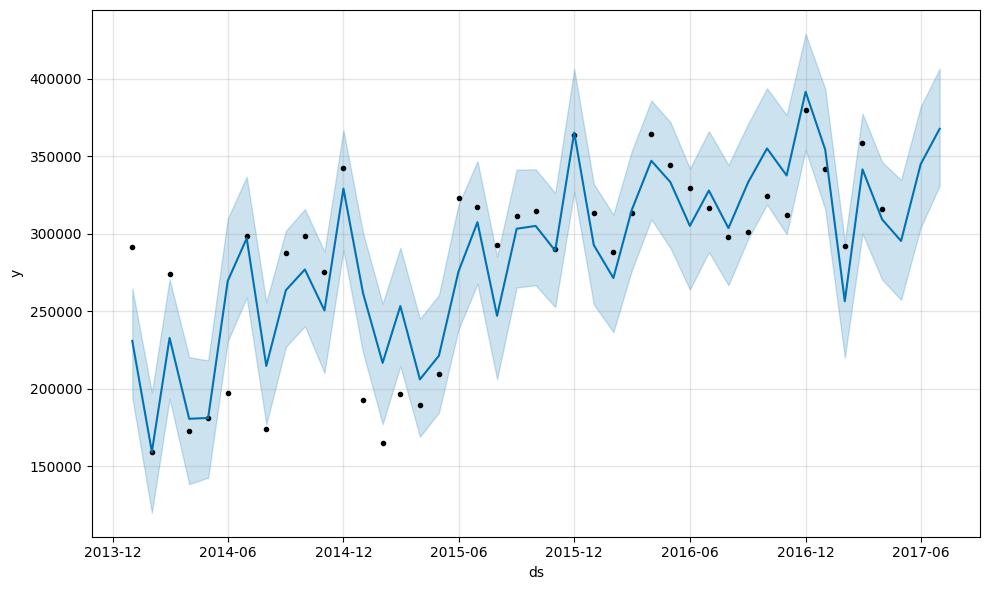

In [89]:
model.plot(forecast)
plt.show()


In [ ]:
## PROPHET MODEL

pred = forecast[['ds', 'yhat']].tail(3)
comparison = test[['ds', 'y']].merge(pred, on='ds')
comparison


,ds,y,yhat
0,2017-05-01,328151.918766,295451.984483
1,2017-06-01,346109.645122,344970.758075
2,2017-07-01,336137.291941,367810.670388


In [96]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(comparison['y'], comparison['yhat'])
mape = mean_absolute_percentage_error(comparison['y'], comparison['yhat'])
print("MAE:", mae)
print("MAPE:", mape)
print("ACCURACY :", 1- mape)

MAE: 21837.399925780133
MAPE: 0.06572227038542204
ACCURACY : 0.934277729614578


In [93]:
comparison

,ds,y,yhat
0,2017-05-01,328151.918766,295451.984483
1,2017-06-01,346109.645122,344970.758075
2,2017-07-01,336137.291941,367810.670388


### PROPHET MODEL

#### Prophet handled trend + seasonality much better due to its flexibility. It automatically modeled holiday effects and non-linear growth. Even though R² was negative (common in time-series), the MAPE of ~0.065 clearly shows strong accuracy. This means the model’s predictions are only about 6.5% off from the actual values on average.